# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
DATA_PATH = r"/content/food_orders_new_delhi (1).csv"
data = pd.read_csv(DATA_PATH)

# **Data Exploration**

In [3]:
print(f"The shape of the data is : {data.shape}")
data.head()

The shape of the data is : (1000, 12)


,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [ ]:
data.isnull().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

In [ ]:
data['Discounts and Offers'].value_counts()

Discounts and Offers
10%             233
50 off Promo    201
15% New User    198
5% on App       183
Name: count, dtype: int64

In [4]:
data['Discounts and Offers'].fillna(data['Discounts and Offers'].mode()[0], inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    1000 non-null   object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [ ]:
# data['Discounts and Offers']

In [5]:
data['Order Date and Time'] = pd.to_datetime(data['Order Date and Time'])
data['Delivery Date and Time'] = pd.to_datetime(data['Delivery Date and Time'])

In [6]:
data['Order_Day_Name'] = data['Order Date and Time'].dt.day_name()
data['Order_Date_Month'] = data['Order Date and Time'].dt.month
data['Order_Date_Day'] = data['Order Date and Time'].dt.day
data['Order_Date_hour'] = data['Order Date and Time'].dt.hour
data['Order_Date_dayofweek'] =data['Order Date and Time'].dt.dayofweek

In [7]:
data['Delivery_Day_Name'] = data['Delivery Date and Time'].dt.day_name()
data['Delivery_Date_Month'] = data['Delivery Date and Time'].dt.month
data['Delivery_Date_Day'] = data['Delivery Date and Time'].dt.day
data['Delivery_Date_hour'] = data['Delivery Date and Time'].dt.hour
data['Delivery_Date_dayofweek'] =data['Delivery Date and Time'].dt.dayofweek

In [ ]:
data.groupby(['Discounts and Offers','Payment Method']).agg({'Order Value': 'mean'})

Order Value
Discounts and Offers Payment Method               
10%                  Cash on Delivery  1027.986486
                     Credit Card       1097.388889
                     Digital Wallet    1025.523810
15% New User         Cash on Delivery  1079.987013
                     Credit Card        925.852941
                     Digital Wallet    1009.075472
5% on App            Cash on Delivery  1066.693548
                     Credit Card       1152.555556
                     Digital Wallet     993.731343
50 off Promo         Cash on Delivery  1046.185714
                     Credit Card       1098.422535
                     Digital Wallet    1146.916667

<Figure size 2000x800 with 0 Axes>

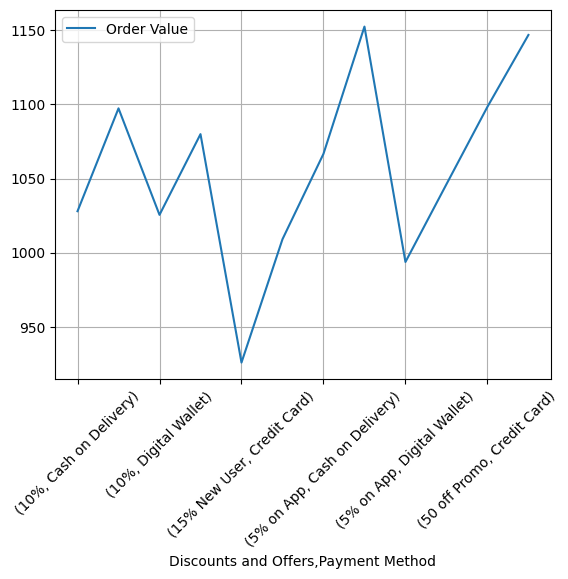

In [ ]:
plt.figure(figsize = [20,8])
data.groupby(['Discounts and Offers','Payment Method']).agg({'Order Value': 'mean'}).plot()
plt.grid();
plt.xticks(rotation = 45)
plt.show();

In [ ]:
data.groupby(['Discounts and Offers']).agg({'Order Value': 'mean',
                                            'Delivery Fee': 'mean',
                                            'Commission Fee': 'mean'})

,Order Value,Delivery Fee
Discounts and Offers,,
10%,1051.153110,28.684211
15% New User,1008.070707,27.929293
5% on App,1065.316940,28.360656
50 off Promo,1094.706468,29.402985


In [ ]:
data.groupby(['Delivery_Date_Month','Delivery_Day_Name']).agg({'Order Value': 'mean',
                                                                'Delivery Fee': 'mean',
                                                                'Commission Fee': 'mean'})

Order Value  Delivery Fee  \
Delivery_Date_Month Delivery_Day_Name                              
1                   Friday             1068.614583     27.187500   
                    Monday              992.117647     27.731092   
                    Saturday           1029.554688     30.546875   
                    Sunday             1060.030612     31.632653   
                    Thursday           1031.676471     28.235294   
                    Tuesday            1085.648649     27.162162   
                    Wednesday          1092.336283     27.787611   
2                   Friday             1122.740741     30.740741   
                    Monday             1030.375000     25.833333   
                    Saturday           1034.068966     30.000000   
                    Sunday             1200.260870     29.130435   
                    Thursday           1191.970588     28.823529   
                    Tuesday             811.275862     30.344828   
                    Wednesday          1054.066667     27.000000   

                                       Commission Fee  
Delivery_Date_Month Delivery_Day_Name                  
1                   Friday                 127.770833  
                    Monday                 125.739496  
                    Saturday               125.242188  
                    Sunday                 131.520408  
                    Thursday               130.313725  
                    Tuesday                125.675676  
                    Wednesday              127.681416  
2                   Friday                 130.592593  
                    Monday                 115.291667  
                    Saturday               131.620690  
                    Sunday                 110.739130  
                    Thursday               131.000000  
                    Tuesday                128.310345  
                    Wednesday              122.966667

In [ ]:
monthly_grouped_aggregations = data.groupby(['Delivery_Date_Month','Order_Date_Day']).agg({'Order Value': 'mean',
                                                                'Delivery Fee': 'mean',
                                                                'Commission Fee': 'mean'}).reset_index()
monthly_grouped_aggregations_for_month1 =  monthly_grouped_aggregations[monthly_grouped_aggregations['Delivery_Date_Month']==1]
monthly_grouped_aggregations_for_month2 = monthly_grouped_aggregations[monthly_grouped_aggregations['Delivery_Date_Month']==2]

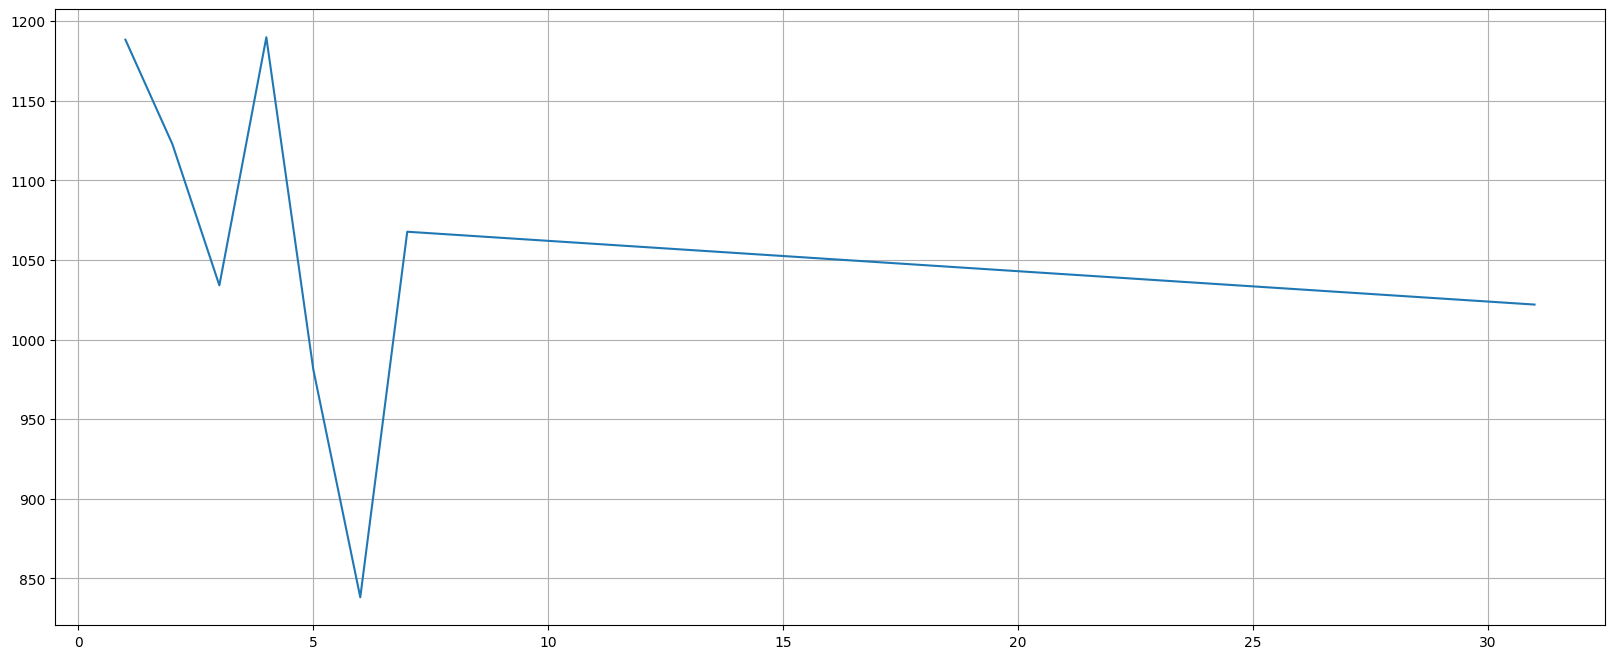

In [ ]:
plt.figure(figsize = [20,8])
plt.plot(monthly_grouped_aggregations_for_month2['Order_Date_Day'],
         monthly_grouped_aggregations_for_month2['Order Value'])
plt.grid();

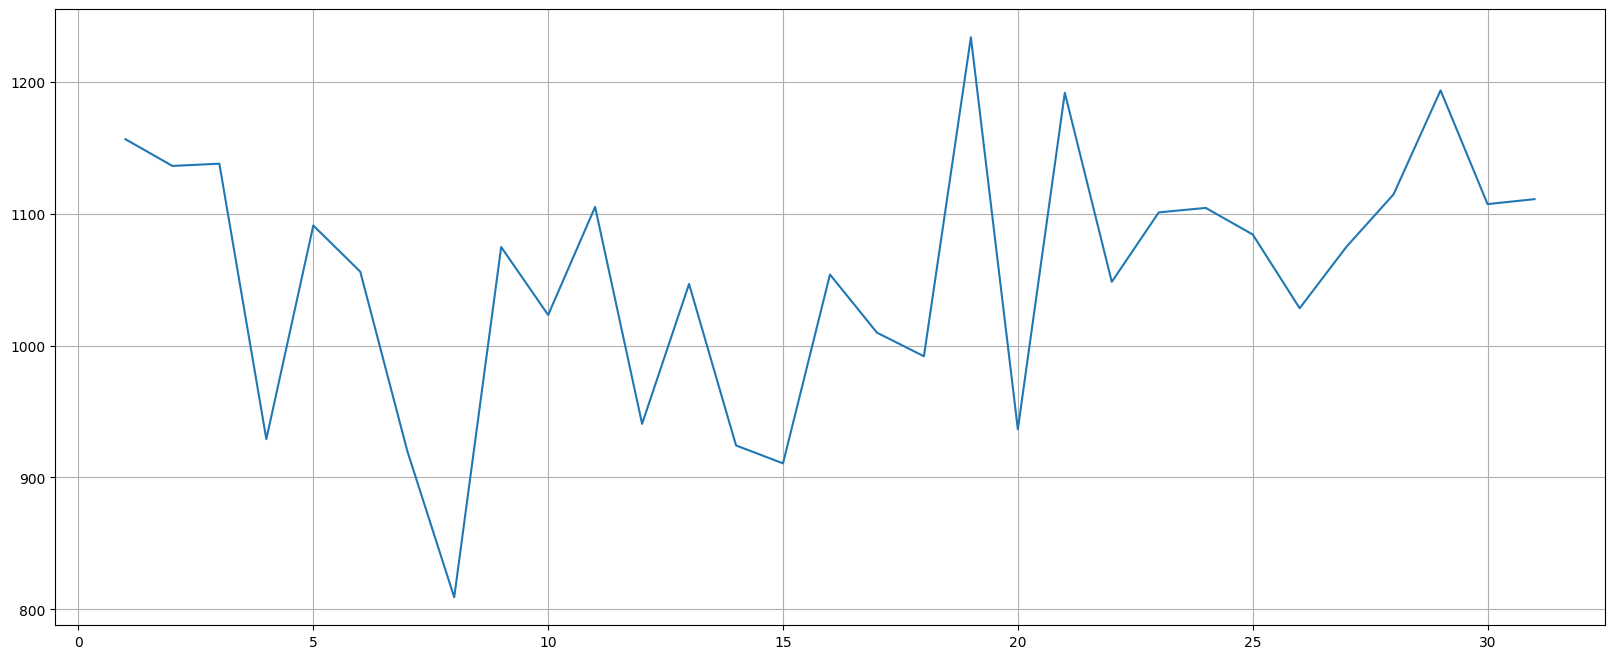

In [ ]:
plt.figure(figsize = [20,8])
plt.plot(monthly_grouped_aggregations_for_month1['Order_Date_Day'],
         monthly_grouped_aggregations_for_month1['Order Value'])
plt.grid();

Individual Order Profitability:
   order_id  revenue  total_cost  profit
0         1      100          57      43
1         2      150          77      73
2         3      200         107      93
3         4      120          67      53
4         5      180          97      83

Total Revenue: 750
Total Cost: 405
Total Profit: 345


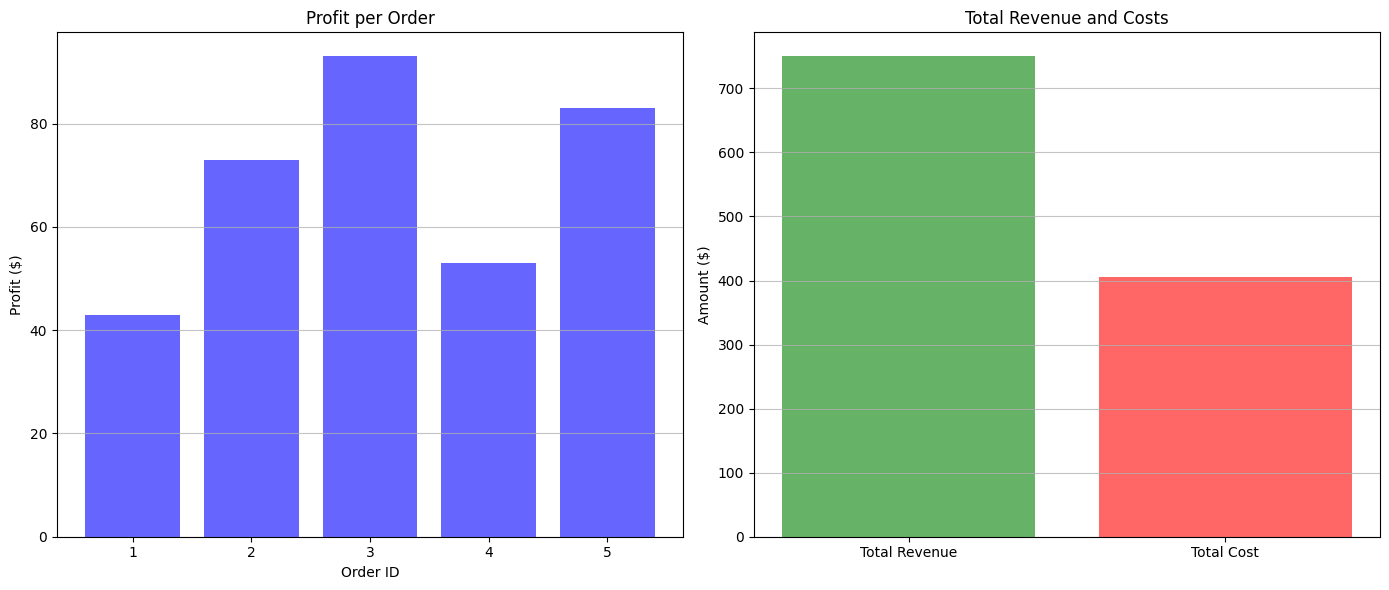

In [40]:
import pandas as pd
import matplotlib.pyplot as plt



# Ensure the DataFrame contains the necessary columns
required_columns = ['order_id', 'revenue', 'cost', 'delivery_fee', 'payment_processing_fee']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Missing required column: {col}")

# Calculate original total cost and profit
df['total_cost'] = df['cost'] + df['delivery_fee'] + df['payment_processing_fee']
df['profit'] = df['revenue'] - df['total_cost']

# Aggregating for overall profitability
total_revenue = df['revenue'].sum()
total_cost = df['total_cost'].sum()
total_profit = total_revenue - total_cost

# Displaying the results
print("Individual Order Profitability:")
print(df[['order_id', 'revenue', 'total_cost', 'profit']])
print(f"\nTotal Revenue: {total_revenue}")
print(f"Total Cost: {total_cost}")
print(f"Total Profit: {total_profit}")

# Visualization
plt.figure(figsize=(14, 6))

# Bar chart for Profit per Order
plt.subplot(1, 2, 1)
plt.bar(df['order_id'], df['profit'], color='blue', alpha=0.6)
plt.title('Profit per Order')
plt.xlabel('Order ID')
plt.ylabel('Profit ($)')
plt.xticks(df['order_id'])
plt.grid(axis='y', alpha=0.75)

# Bar chart for Total Revenue and Costs
plt.subplot(1, 2, 2)
plt.bar(['Total Revenue', 'Total Cost'], [total_revenue, total_cost], color=['green', 'red'], alpha=0.6)
plt.title('Total Revenue and Costs')
plt.ylabel('Amount ($)')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()


<Axes: xlabel='Order_Date_Day'>

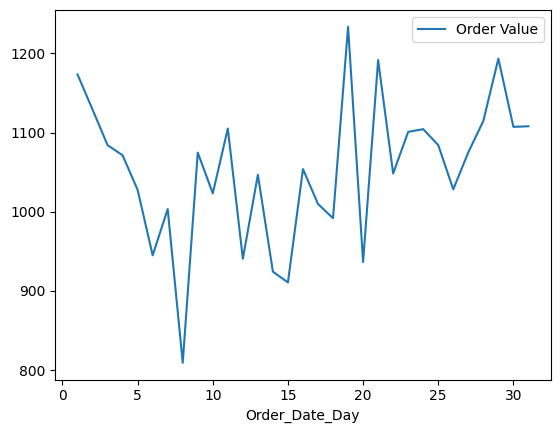

In [ ]:
data.groupby(['Order_Date_Day']).agg({'Order Value': 'mean'}).plot()

In [ ]:
data.groupby(['Delivery_Date_Month','Order_Date_Day']).agg({'Order Value': 'mean',
                                                                'Delivery Fee': 'mean',
                                                                'Commission Fee': 'mean'})

Order Value  Delivery Fee  Commission Fee
Delivery_Date_Month Order_Date_Day                                           
1                   1               1156.428571     23.928571      135.178571
                    2               1136.166667     29.583333      121.083333
                    3               1137.851852     27.407407      125.592593
                    4                929.100000     27.000000      126.600000
                    5               1091.000000     24.736842      109.210526
                    6               1056.000000     32.400000      129.600000
                    7                920.208333     35.416667      123.166667
                    8                809.173913     27.391304      125.391304
                    9               1074.692308     25.000000      114.153846
                    10              1023.176471     27.647059      115.411765
                    11              1105.090909     21.363636      130.500000
                    12               940.633333     27.000000      137.766667
                    13              1046.657895     28.157895      124.868421
                    14               924.272727     28.181818      140.681818
                    15               910.676471     29.117647      123.088235
                    16              1053.843750     25.312500      136.000000
                    17              1009.777778     25.000000      124.666667
                    18               991.878788     33.939394      131.909091
                    19              1233.680000     30.000000      120.440000
                    20               936.500000     30.588235      127.029412
                    21              1191.592593     28.888889      133.370370
                    22              1048.294118     33.529412      130.764706
                    23              1100.939394     25.757576      118.515152
                    24              1104.333333     30.000000      137.047619
                    25              1084.192308     30.384615      130.961538
                    26              1028.280000     26.800000      127.800000
                    27              1075.032258     32.580645      126.967742
                    28              1114.640000     31.600000      133.360000
                    29              1193.444444     28.888889      109.666667
                    30              1107.225806     28.064516      134.387097
                    31              1110.965517     27.931034      132.379310
2                   1               1188.343750     28.750000      129.156250
                    2               1122.740741     30.740741      130.592593
                    3               1034.068966     30.000000      131.620690
                    4               1189.875000     28.750000      113.750000
                    5                981.269231     27.692308      114.961538
                    6                838.153846     29.230769      127.538462
                    7               1067.741935     27.419355      123.612903
                    31              1022.000000     20.000000      178.000000

In [ ]:
data.columns

Index(['Order ID', 'Customer ID', 'Restaurant ID', 'Order Date and Time',
       'Delivery Date and Time', 'Order Value', 'Delivery Fee',
       'Payment Method', 'Discounts and Offers', 'Commission Fee',
       'Payment Processing Fee', 'Refunds/Chargebacks', 'Order_Day_Name',
       'Order_Date_Month', 'Order_Date_Day', 'Order_Date_hour',
       'Order_Date_dayofweek', 'Delivery_Day_Name', 'Delivery_Date_Month',
       'Delivery_Date_Day', 'Delivery_Date_hour', 'Delivery_Date_dayofweek'],
      dtype='object')

<Axes: xlabel='Delivery_Day_Name'>

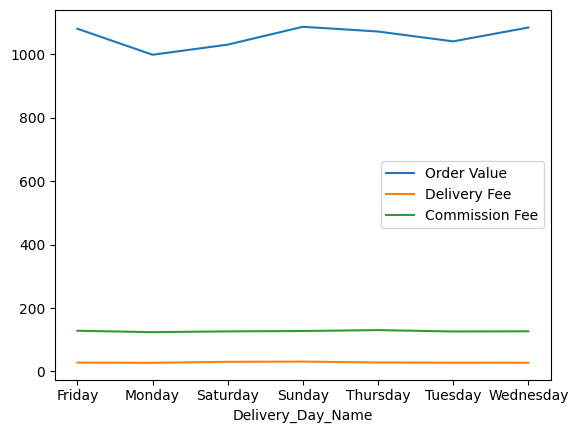

In [ ]:
data.groupby(['Delivery_Day_Name']).agg({'Order Value': 'mean',
                                            'Delivery Fee': 'mean',
                                            'Commission Fee': 'mean'}).plot()

In [ ]:
data.columns

Index(['Order ID', 'Customer ID', 'Restaurant ID', 'Order Date and Time',
       'Delivery Date and Time', 'Order Value', 'Delivery Fee',
       'Payment Method', 'Discounts and Offers', 'Commission Fee',
       'Payment Processing Fee', 'Refunds/Chargebacks', 'Order_Day_Name',
       'Order_Date_Month', 'Order_Date_Day', 'Order_Date_hour',
       'Order_Date_dayofweek', 'Delivery_Day_Name', 'Delivery_Date_Month',
       'Delivery_Date_Day', 'Delivery_Date_hour', 'Delivery_Date_dayofweek'],
      dtype='object')

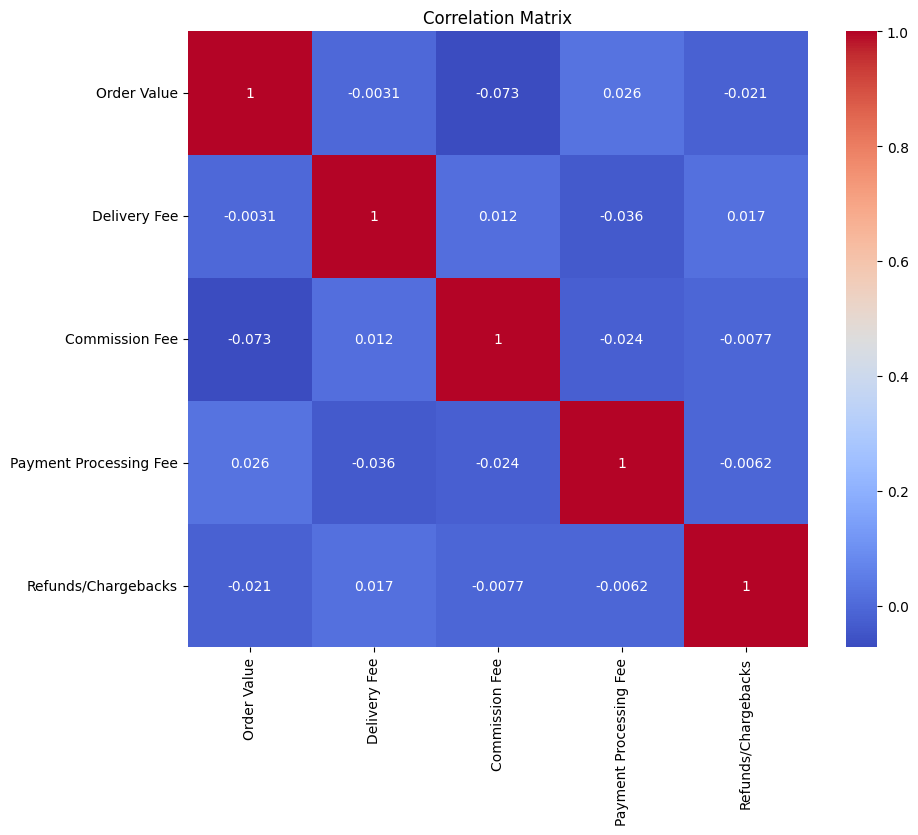

In [10]:
# Select the relevant numerical columns
numeric_columns = ['Order Value', 'Delivery Fee', 'Commission Fee', 'Payment Processing Fee', 'Refunds/Chargebacks']

# Calculate the correlation matrix
correlation_matrix = data[numeric_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [18]:
print(df.columns.tolist())

['order_id', 'revenue', 'cost', 'delivery_fee', 'payment_processing_fee', 'new_discount', 'new_commission', 'adjusted_total_cost', 'adjusted_profit']


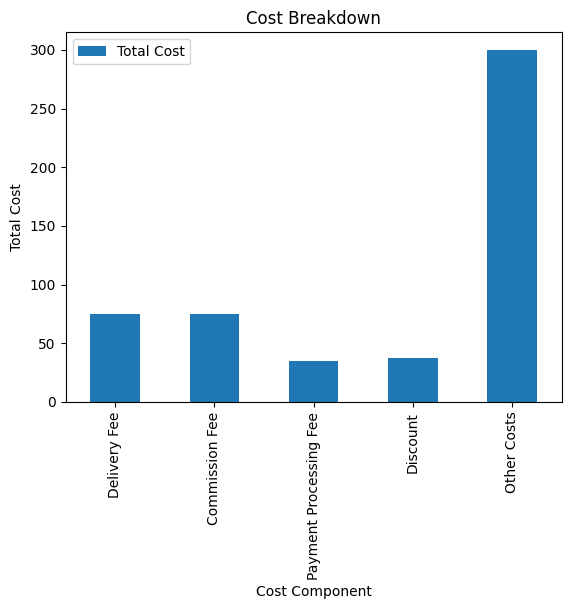

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate total cost per order
df['Total Cost'] = df['cost'] + df['delivery_fee'] + df['payment_processing_fee'] + df['new_discount'] + df['new_commission']

# Calculate total costs for each component
total_cost = df['Total Cost'].sum()
total_delivery_fee = df['delivery_fee'].sum()
total_commission_fee = df['new_commission'].sum()
total_payment_processing_fee = df['payment_processing_fee'].sum()
total_discount = df['new_discount'].sum()

# Create a DataFrame to visualize the cost breakdown
cost_breakdown = pd.DataFrame({'Cost Component': ['Delivery Fee', 'Commission Fee', 'Payment Processing Fee', 'Discount', 'Other Costs'],
                               'Total Cost': [total_delivery_fee, total_commission_fee, total_payment_processing_fee, total_discount, total_cost - total_delivery_fee - total_commission_fee - total_payment_processing_fee - total_discount]})

# Visualize the cost breakdown using a bar chart
cost_breakdown.plot(kind='bar', x='Cost Component', y='Total Cost')
plt.title('Cost Breakdown')
plt.xlabel('Cost Component')
plt.ylabel('Total Cost')
plt.show()

In [44]:
# Define ranges for commission and discount rates
discount_rates = [0.00, 0.05, 0.10]
commission_rates = [0.05, 0.10, 0.15]

results = []

# Simulate the impact of different discount and commission combinations
for discount in discount_rates:
    for commission in commission_rates:
        # Calculate new financial metrics based on the rates
        df['new_discount'] = df['revenue'] * discount
        df['new_commission'] = df['revenue'] * commission
        df['adjusted_total_cost'] = (
            df['cost'] +
            df['delivery_fee'] +
            df['payment_processing_fee'] +
            df['new_discount'] +
            df['new_commission']
        )
        df['adjusted_profit'] = df['revenue'] - df['adjusted_total_cost']

        # Aggregate results
        total_revenue = df['revenue'].sum()
        total_cost = df['adjusted_total_cost'].sum()
        total_profit = total_revenue - total_cost

        results.append((discount, commission, total_revenue, total_cost, total_profit))

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results, columns=['Discount Rate', 'Commission Rate', 'Total Revenue', 'Total Cost', 'Total Profit'])

# Display results
print(results_df)


   Discount Rate  Commission Rate  Total Revenue  Total Cost  Total Profit
0           0.00             0.05            750       442.5         307.5
1           0.00             0.10            750       480.0         270.0
2           0.00             0.15            750       517.5         232.5
3           0.05             0.05            750       480.0         270.0
4           0.05             0.10            750       517.5         232.5
5           0.05             0.15            750       555.0         195.0
6           0.10             0.05            750       517.5         232.5
7           0.10             0.10            750       555.0         195.0
8           0.10             0.15            750       592.5         157.5


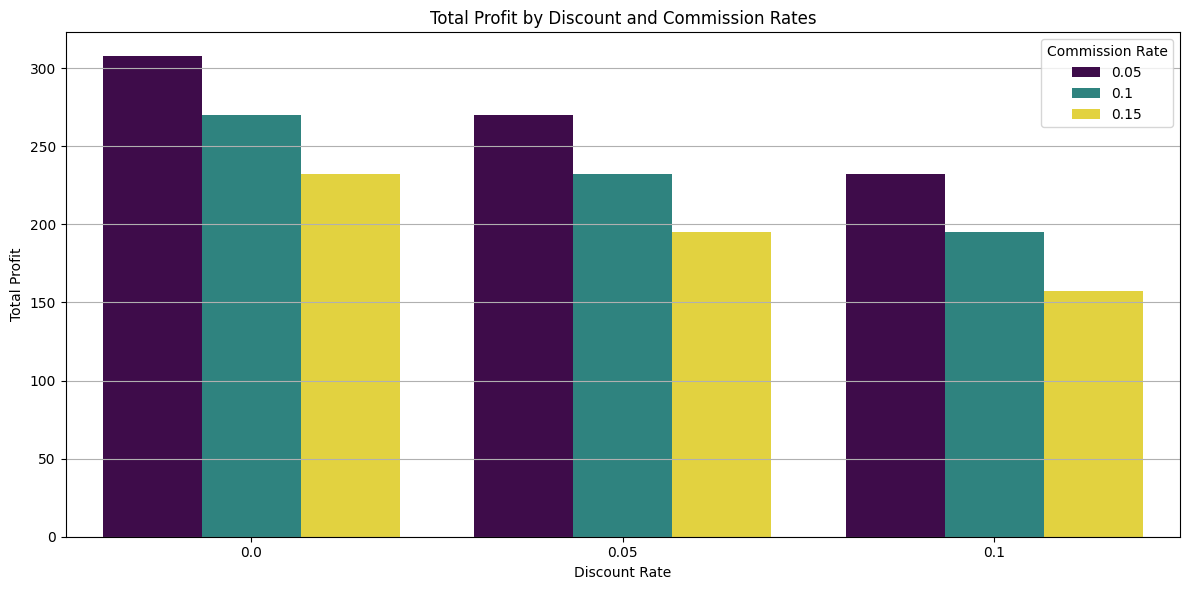

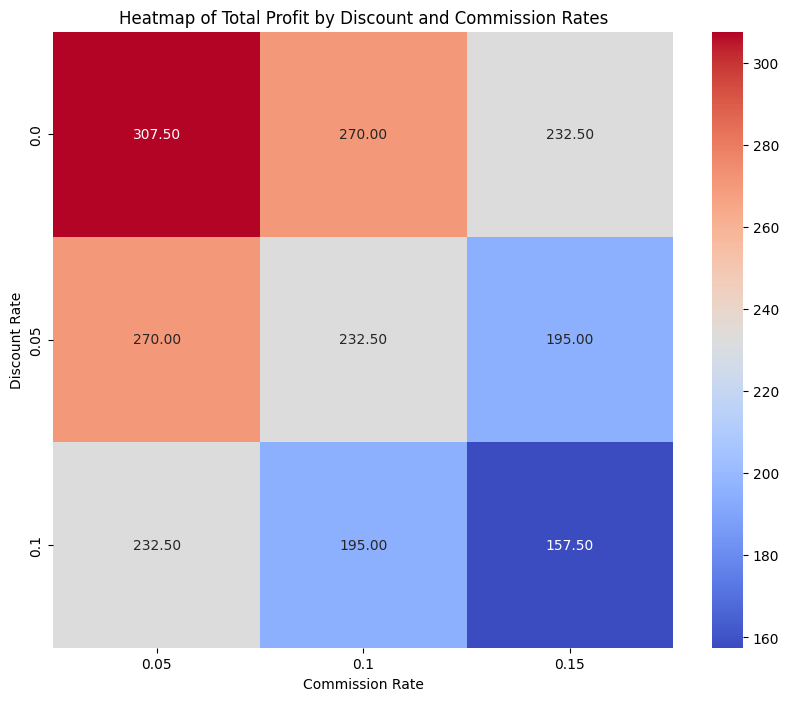

In [46]:
# Create a bar plot for Total Profit across different discount and commission rates
plt.figure(figsize=(12, 6))
sns.barplot(x='Discount Rate', y='Total Profit', hue='Commission Rate', data=results_df, palette='viridis')
plt.title('Total Profit by Discount and Commission Rates')
plt.xlabel('Discount Rate')
plt.ylabel('Total Profit')
plt.legend(title='Commission Rate')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
# Create a heatmap to visualize total profit
heatmap_data = results_df.pivot(index="Discount Rate", columns="Commission Rate", values="Total Profit")
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Total Profit by Discount and Commission Rates')
plt.xlabel('Commission Rate')
plt.ylabel('Discount Rate')
plt.show()

